*ANÁLISE DE DADOS - REDES SOCIAIS E SAÚDE MENTAL*

In [ ]:
# importação de bibliotecas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [407]:
# transformando arquivo CSV em DataFrame
df = pd.read_csv('C:/Dados/smmh.csv')

In [409]:
# visualização prévia dos dados
df.head(4).T

,0,1,2,3
Timestamp,4/18/2022 19:18:47,4/18/2022 19:19:28,4/18/2022 19:25:59,4/18/2022 19:29:43
1. What is your age?,21.0,21.0,21.0,21.0
2. Gender,Male,Female,Female,Female
3. Relationship Status,In a relationship,Single,Single,Single
4. Occupation Status,University Student,University Student,University Student,University Student
5. What type of organizations are you affiliated with?,University,University,University,University
6. Do you use social media?,Yes,Yes,Yes,Yes
7. What social media platforms do you commonly use?,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Instagram, YouTube, Pinterest","Facebook, Instagram"
8. What is the average time you spend on social media every day?,Between 2 and 3 hours,More than 5 hours,Between 3 and 4 hours,More than 5 hours
9. How often do you find yourself using Social media without a specific purpose?,5,4,3,4


In [411]:
# criação de um dicionário para normalização de nomes das colunas
col_names_dict = {
    'Timestamp': 'data',
    '1. What is your age?': 'idade',
    '2. Gender': 'gênero',
    '3. Relationship Status': 'status',
    '4. Occupation Status': 'ocupação',
    '5. What type of organizations are you affiliated with?': 'organização_afiliada',
    '6. Do you use social media?': 'status_de_uso',
    '7. What social media platforms do you commonly use?': 'plataformas',
    '8. What is the average time you spend on social media every day?': 'tempo_medio',
    '9. How often do you find yourself using Social media without a specific purpose?': 'freq_uso_sem_proposito',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'freq_distração',
    "11. Do you feel restless if you haven't used Social media in a while?": 'agitação',
    '12. On a scale of 1 to 5, how easily distracted are you?' : 'taxa_distração',
    '13. On a scale of 1 to 5, how much are you bothered by worries?' : 'taxa_preocupação',
    '14. Do you find it difficult to concentrate on things?' : 'concentração',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?' : 'taxa_de_comparação',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?' : 'sentimento_comparação',
    '17. How often do you look to seek validation from features of social media?' : 'freq_validação',
    '18. How often do you feel depressed or down?' : 'freq_deprimido',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?' : 'taxa_interesse_ativ',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?' : 'taxa_problemas_sono'
}

In [413]:
# ranomeação das colunas e visualização
df.rename(columns=col_names_dict, inplace=True)
df.head(4).T

,0,1,2,3
data,4/18/2022 19:18:47,4/18/2022 19:19:28,4/18/2022 19:25:59,4/18/2022 19:29:43
idade,21.0,21.0,21.0,21.0
gênero,Male,Female,Female,Female
status,In a relationship,Single,Single,Single
ocupação,University Student,University Student,University Student,University Student
organização_afiliada,University,University,University,University
status_de_uso,Yes,Yes,Yes,Yes
plataformas,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Instagram, YouTube, Pinterest","Facebook, Instagram"
tempo_medio,Between 2 and 3 hours,More than 5 hours,Between 3 and 4 hours,More than 5 hours
freq_uso_sem_proposito,5,4,3,4


In [415]:
# descrição estatística das colunas numéricas do DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,481.0,26.136590,9.915110,13.0,21.0,22.0,26.0,91.0
freq_uso_sem_proposito,481.0,3.553015,1.096299,1.0,3.0,4.0,4.0,5.0
freq_distração,481.0,3.320166,1.328137,1.0,2.0,3.0,4.0,5.0
agitação,481.0,2.588358,1.257059,1.0,2.0,2.0,3.0,5.0
taxa_distração,481.0,3.349272,1.175552,1.0,3.0,3.0,4.0,5.0
taxa_preocupação,481.0,3.559252,1.283356,1.0,3.0,4.0,5.0,5.0
concentração,481.0,3.245322,1.347105,1.0,2.0,3.0,4.0,5.0
taxa_de_comparação,481.0,2.831601,1.407835,1.0,2.0,3.0,4.0,5.0
sentimento_comparação,481.0,2.775468,1.056479,1.0,2.0,3.0,3.0,5.0
freq_validação,481.0,2.455301,1.247739,1.0,1.0,2.0,3.0,5.0


In [417]:
# quantidade de dados NULL por coluna
print(df.isnull().sum().index)
print(df.isnull().sum())

Index(['data', 'idade', 'gênero', 'status', 'ocupação', 'organização_afiliada',
       'status_de_uso', 'plataformas', 'tempo_medio', 'freq_uso_sem_proposito',
       'freq_distração', 'agitação', 'taxa_distração', 'taxa_preocupação',
       'concentração', 'taxa_de_comparação', 'sentimento_comparação',
       'freq_validação', 'freq_deprimido', 'taxa_interesse_ativ',
       'taxa_problemas_sono'],
      dtype='object')
data                       0
idade                      0
gênero                     0
status                     0
ocupação                   0
organização_afiliada      30
status_de_uso              0
plataformas                0
tempo_medio                0
freq_uso_sem_proposito     0
freq_distração             0
agitação                   0
taxa_distração             0
taxa_preocupação           0
concentração               0
taxa_de_comparação         0
sentimento_comparação      0
freq_validação             0
freq_deprimido             0
taxa_interesse_ativ      

In [636]:
# preenchimento de dados faltantes pelo dado mais frequente
df['organização_afiliada'].fillna(df['organização_afiliada'].value_counts().index[0])

0      10
1      10
2      10
3      10
4      10
       ..
476    17
477    10
478    10
479    10
480     3
Name: organização_afiliada, Length: 481, dtype: int64

In [628]:
# visualiza dados da coluna 'gênero' para normalização
df['gênero'].value_counts()

gênero
0    263
1    211
2      7
Name: count, dtype: int64

In [423]:
# normalizando dados da coluna 'gênero'
df['gênero'] = df['gênero'].apply(lambda x: x if x in ['Male','Female'] else 'other')
df['gênero'].value_counts()

gênero
Female    263
Male      211
other       7
Name: count, dtype: int64

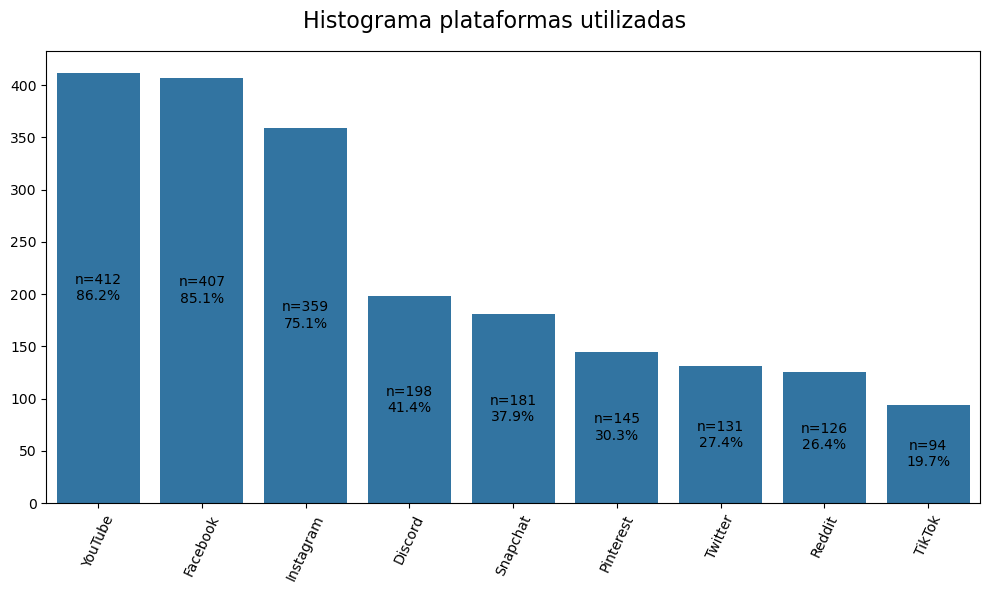

In [425]:
# histograma das plataformas usadas

num_total = df[df['status_de_uso'] == 'Yes'].iloc[:,0].count()
num_plat = df['plataformas'].str.split(', ', expand=True).stack().value_counts()

fig, bar = plt.subplots(figsize=(10,6))
sns.barplot(x=num_plat.index,
            y=num_plat, 
            ax=bar)
fig.suptitle("Histograma plataformas utilizadas", fontsize=16)
bar.set_xlabel("")
bar.set_ylabel("")
bar.tick_params(axis='x', rotation=65)

for p in bar.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2.0, h / 2)
    percent = (h/num_total)*100
    bar.annotate(text=f'n={h:0.0f}\n{percent:0.1f}%', xy=xy, ha='center', va='center')
    
plt.tight_layout();

In [427]:
# criação da coluna 'taxa_impacto'

df['taxa_impacto'] = 0

df['taxa_impacto'] = df['freq_uso_sem_proposito'] + df['freq_distração'] + df['agitação']
+ df['taxa_distração'] + df['taxa_preocupação'] + df['concentração']
+ df['taxa_de_comparação'] + df['sentimento_comparação'] + df['freq_validação']
+ df['freq_deprimido'] + df['taxa_interesse_ativ'] + df['taxa_problemas_sono']

In [602]:
# descrição estatística da noma coluna
df['taxa_impacto'].describe()

count    481.000000
mean      37.305613
std        9.332077
min       12.000000
25%       32.000000
50%       38.000000
75%       44.000000
max       60.000000
Name: taxa_impacto, dtype: float64

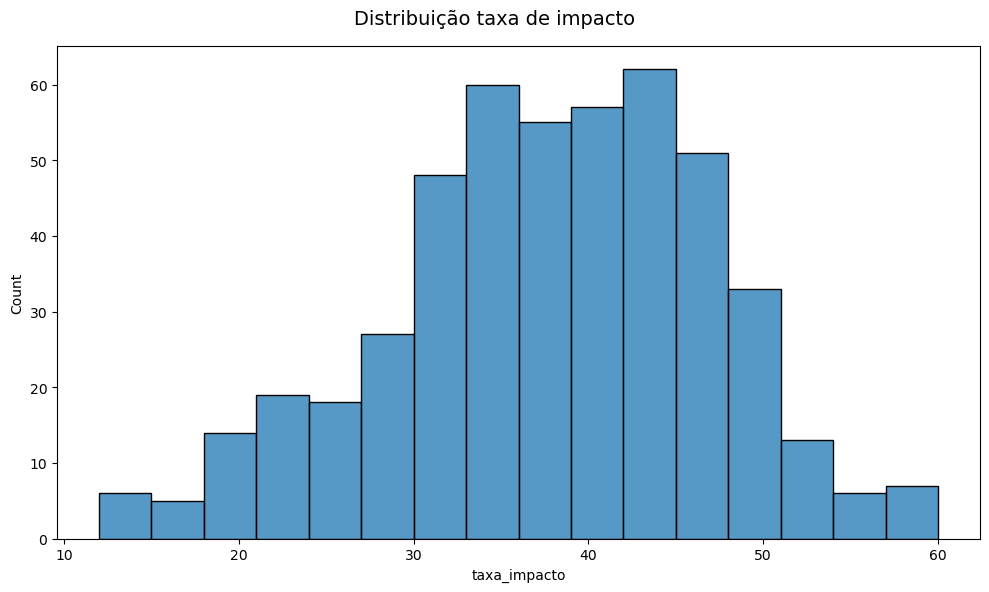

In [429]:
# histograma 'taxa_impacto'
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data = df, x='taxa_impacto', bins=16, ax=ax)
fig.suptitle('Distribuição taxa de impacto', fontsize=14)
plt.tight_layout();

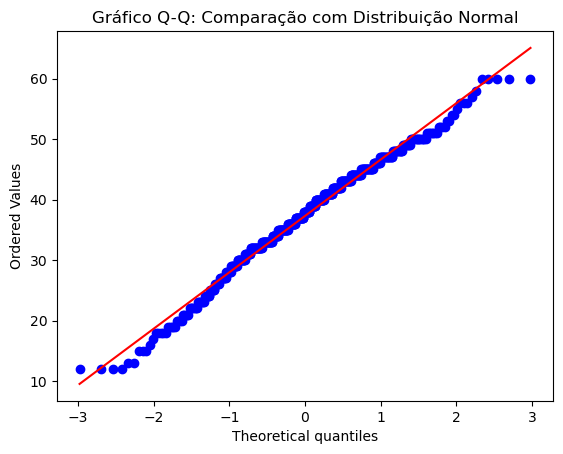

In [431]:
# gráfico Q-Q para analisar dados da 'taxa_impacto' com dados teóricos de uma distribuição normal 
stats.probplot(df['taxa_impacto'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q: Comparação com Distribuição Normal")
plt.show()

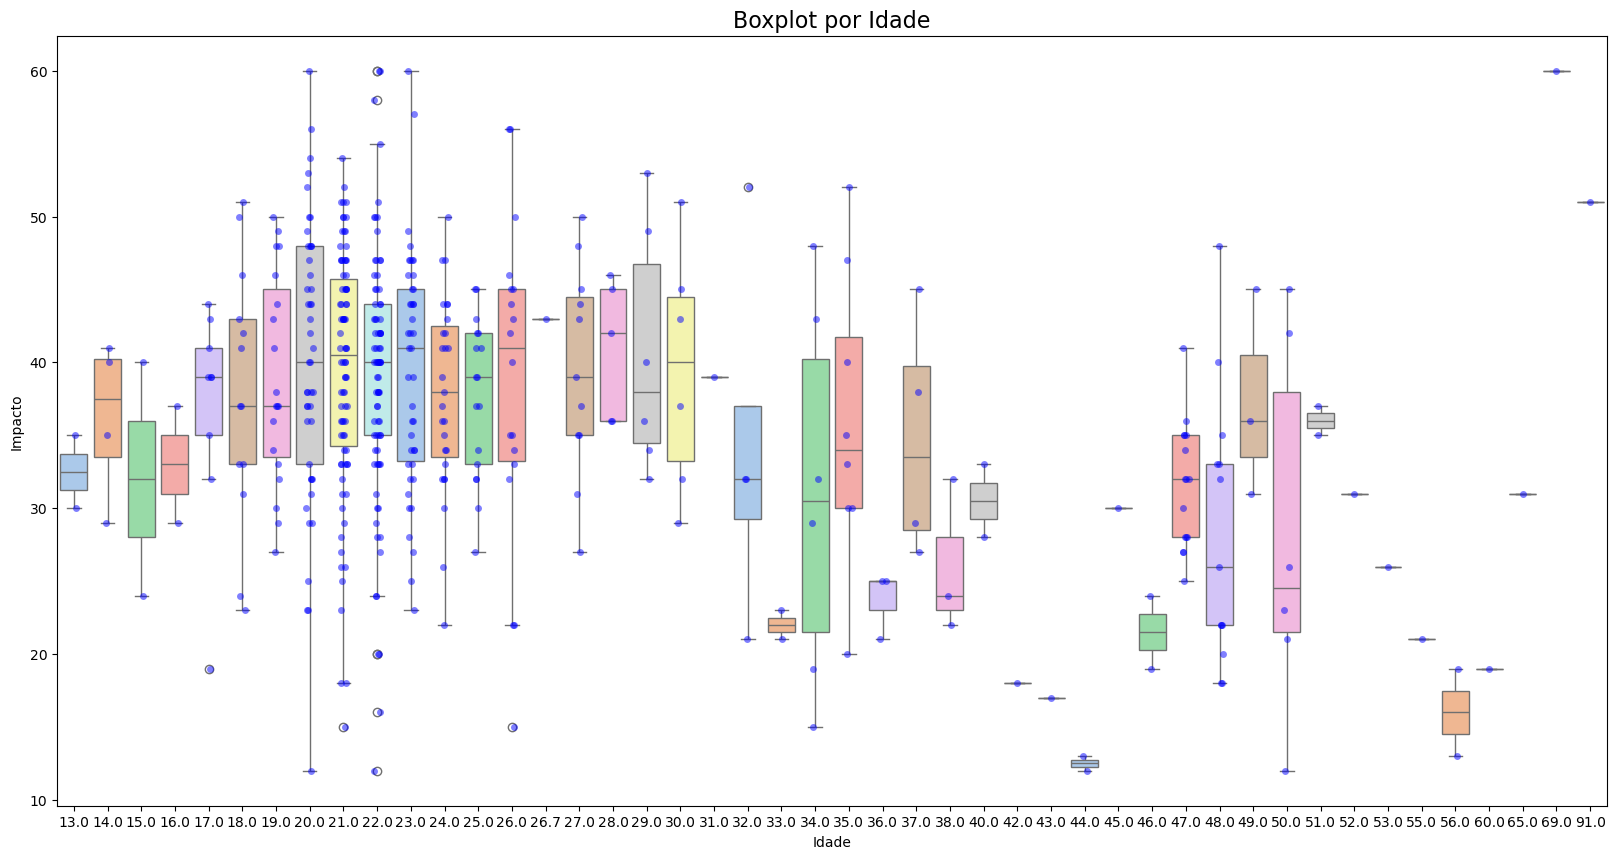

In [433]:
# boxplot Idade vs Taxa de Impacto
plt.figure(figsize=(20, 10))
sns.boxplot(
    data=df, 
    x='idade', 
    y='taxa_impacto', 
    hue='idade',  
    palette="pastel", 
    legend=False  
)

sns.stripplot(
    data=df,
    x='idade',
    y='taxa_impacto',
    color='blue', 
    alpha=0.5,     
    jitter=True,   
)

plt.title('Boxplot por Idade', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Impacto')

plt.show()

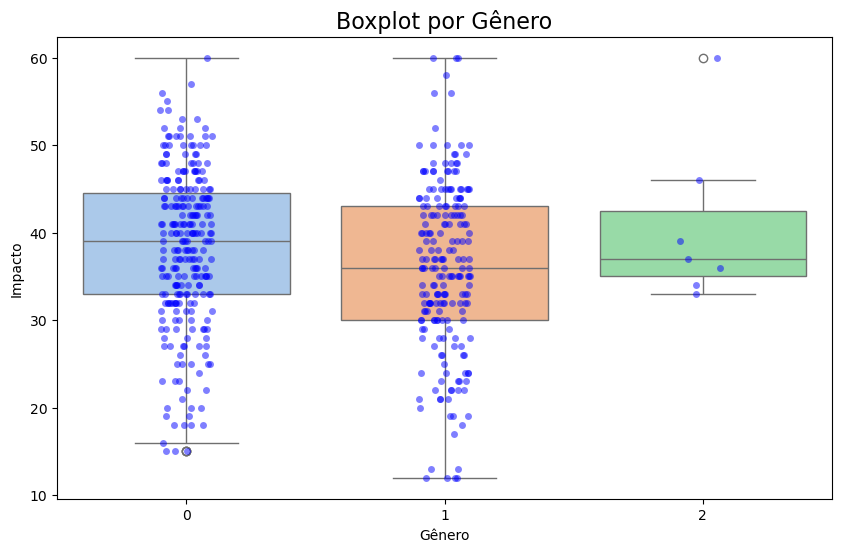

In [608]:
# boxplot Gênero vs Taxa de Impacto
plt.figure(figsize=(10, 6))  
sns.boxplot(
    data=df, 
    x='gênero', 
    y='taxa_impacto', 
    hue='gênero',  
    palette="pastel", 
    legend=False  
)

sns.stripplot(
    data=df,
    x='gênero',
    y='taxa_impacto',
    color='blue',  
    alpha=0.5,   
    jitter=True, 
)

plt.title('Boxplot por Gênero', fontsize=16)
plt.xlabel('Gênero')
plt.ylabel('Impacto')

plt.show()

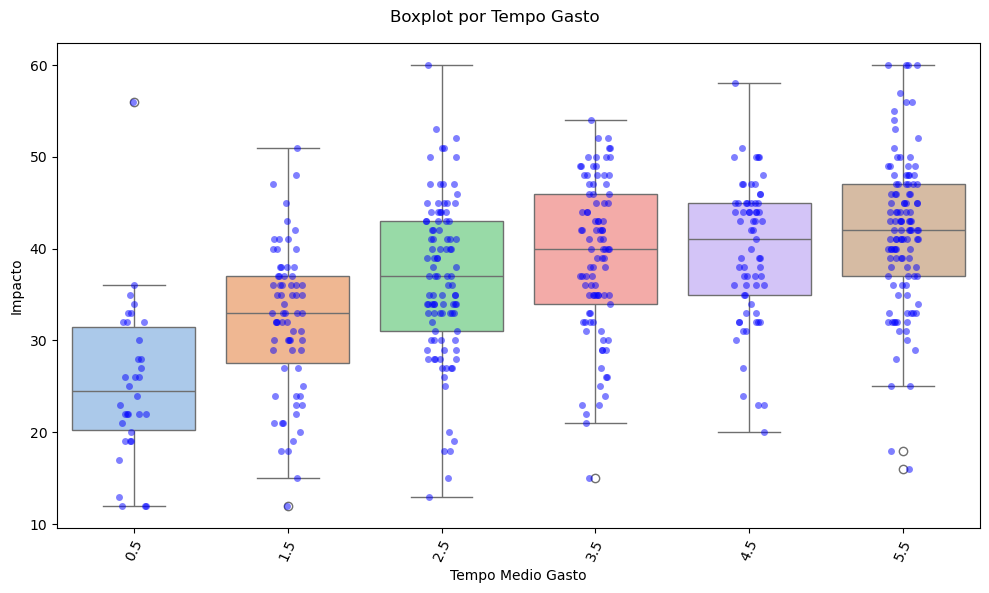

In [610]:
# boxplot Tempo Medio vs Taxa de Impacto
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(
    data=df, 
    x='tempo_medio', 
    y='taxa_impacto', 
    hue='tempo_medio',  
    palette="pastel", 
    legend=False  
)

sns.stripplot(
    data=df,
    x='tempo_medio',
    y='taxa_impacto',
    color='blue',  
    alpha=0.5,    
    jitter=True,    
)

fig.suptitle('Boxplot por Tempo Gasto')
ax.set_xlabel('Tempo Medio Gasto')
ax.set_ylabel('Impacto')
ax.tick_params(axis='x', rotation=65)

plt.tight_layout()

In [441]:
# criando noma coluna com a quantidade de plataformas usadas
df['qtde_plataformas'] = df['plataformas'].str.count(',')
df['qtde_plataformas'] = df['qtde_plataformas'].apply(lambda x: x + 1)

df.head(5).T

,0,1,2,3,4
data,4/18/2022 19:18:47,4/18/2022 19:19:28,4/18/2022 19:25:59,4/18/2022 19:29:43,4/18/2022 19:33:31
idade,21.0,21.0,21.0,21.0,21.0
gênero,Male,Female,Female,Female,Female
status,In a relationship,Single,Single,Single,Single
ocupação,University Student,University Student,University Student,University Student,University Student
organização_afiliada,University,University,University,University,University
status_de_uso,Yes,Yes,Yes,Yes,Yes
plataformas,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Instagram, YouTube, Pinterest","Facebook, Instagram","Facebook, Instagram, YouTube"
tempo_medio,Between 2 and 3 hours,More than 5 hours,Between 3 and 4 hours,More than 5 hours,Between 2 and 3 hours
freq_uso_sem_proposito,5,4,3,4,3


In [604]:
# descrição estatística da noma coluna
df['qtde_plataformas'].describe()

count    481.000000
mean       4.268191
std        1.971887
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        9.000000
Name: qtde_plataformas, dtype: float64

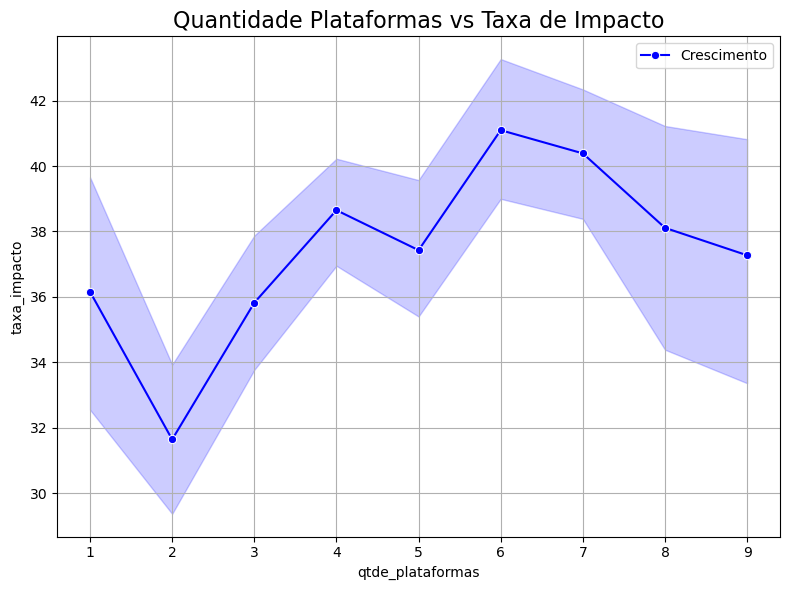

In [612]:
# gráfico de linhas que analisa a tendência do impacto mediante a quantidade de plataformas
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='qtde_plataformas', y='taxa_impacto', marker='o', label='Crescimento', color='blue')

plt.title('Quantidade Plataformas vs Taxa de Impacto', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()

In [614]:
df['qtde_plataformas'].value_counts()

qtde_plataformas
4    103
3     79
5     77
2     59
6     52
7     44
1     38
8     18
9     11
Name: count, dtype: int64

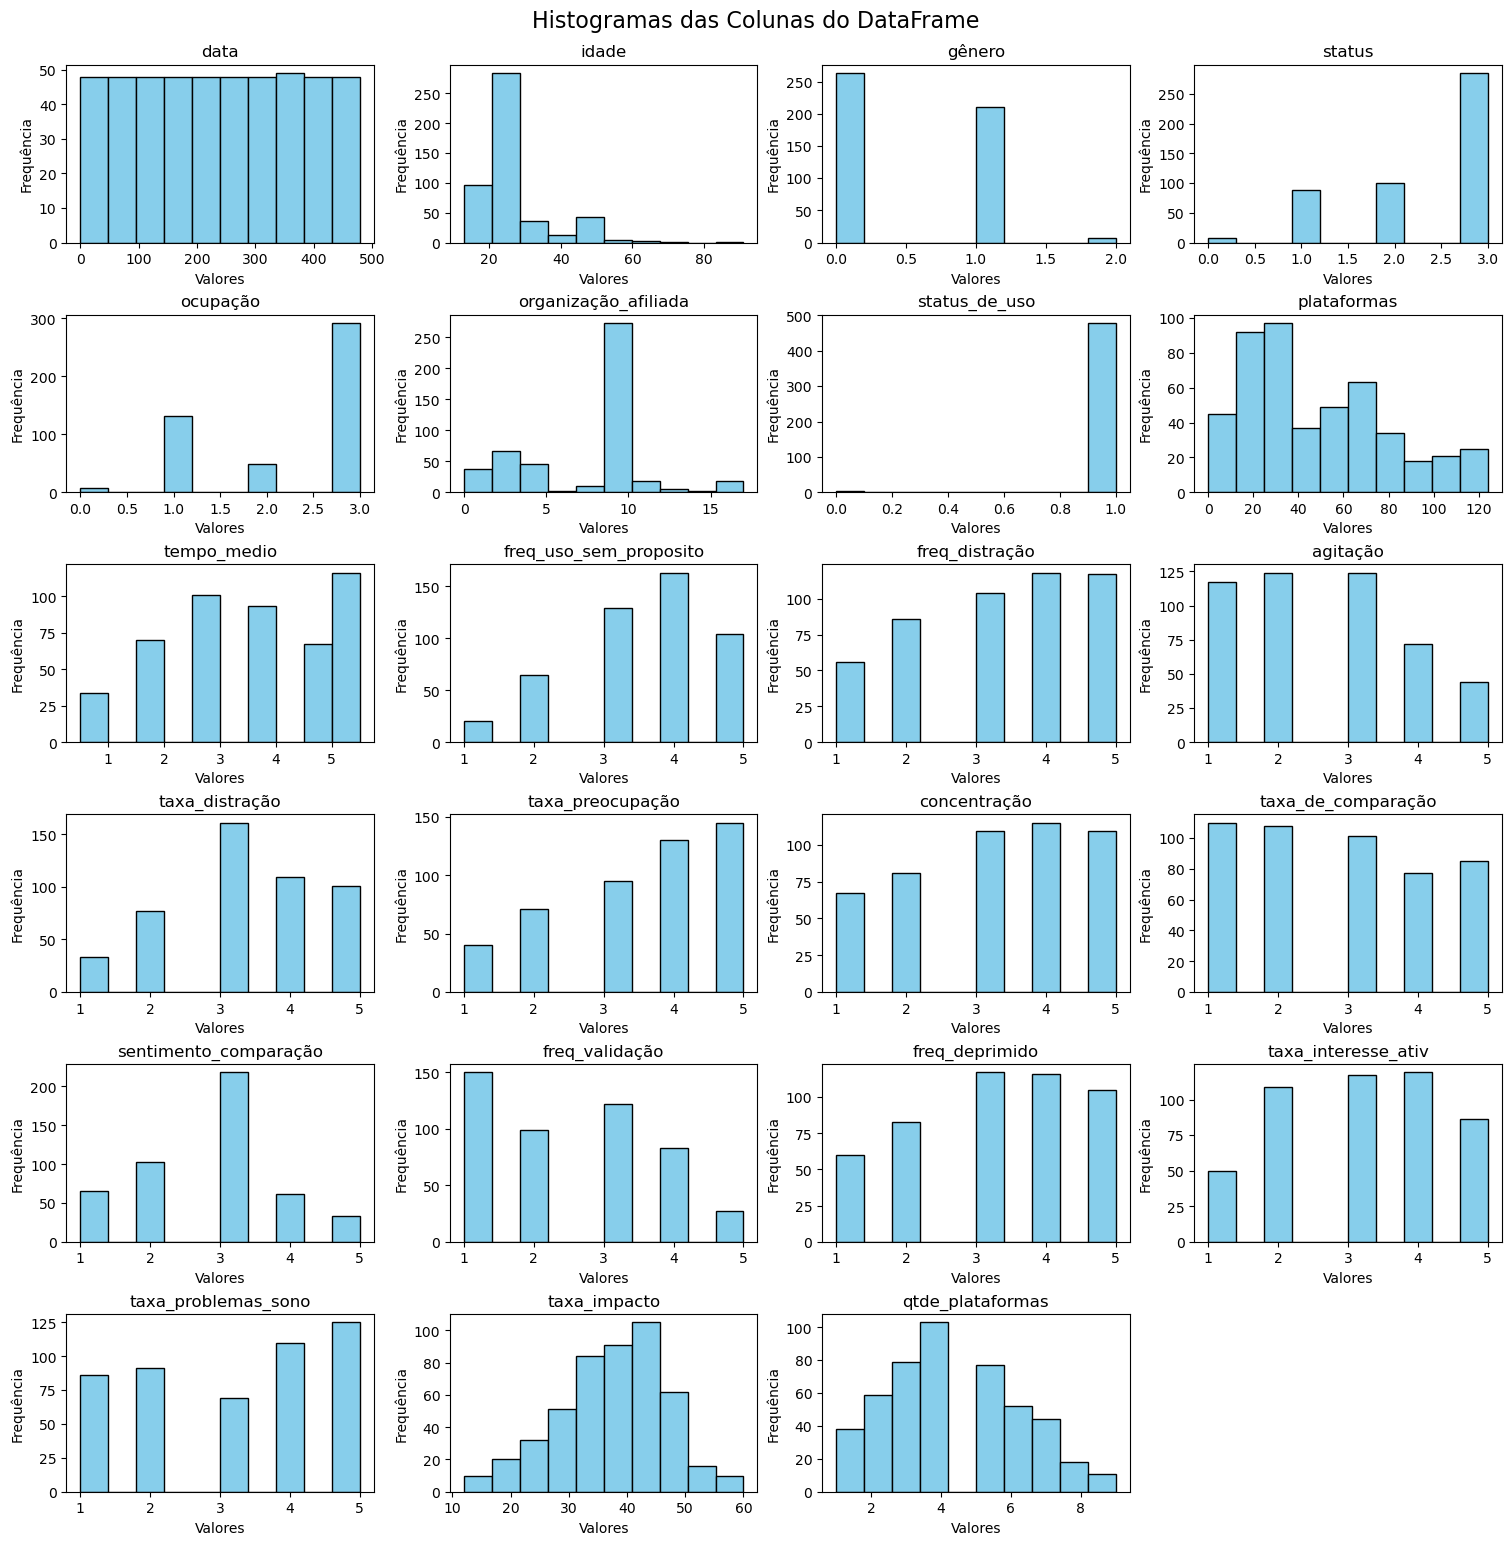

In [586]:
# Definindo o número de colunas e linhas da matriz
num_columns = 4  # Número de histogramas por linha
num_rows = -(-len(df.columns) // num_columns)  # Calcula o número de linhas necessário

# Criando a figura com subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 15), constrained_layout=True)

# Transformando axes em 1D para iteração
axes = axes.flatten()

# Plotando os histogramas
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel("Valores")
    ax.set_ylabel("Frequência")

# Removendo eixos não utilizados, caso o número de gráficos seja menor que o espaço disponível
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

fig.suptitle("Histogramas das Colunas do DataFrame", fontsize=16, y=1.02)

plt.show()

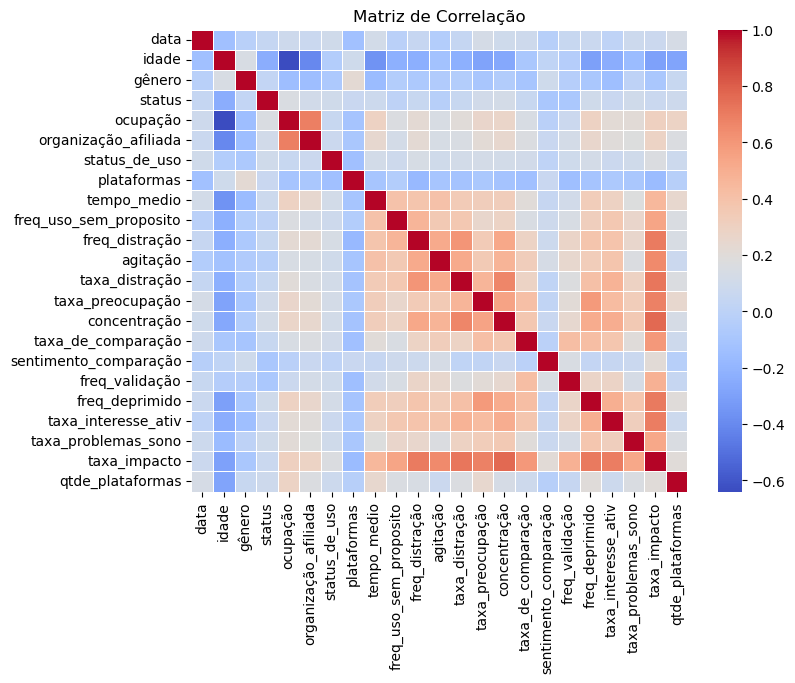

In [620]:
# matriz de correlação de variáveis
new_df = df

# convertendo colunas do tipo str em numérica usando LabelEncoder
label_encoder = LabelEncoder()
new_df['data'] = label_encoder.fit_transform(new_df['data'])
new_df['gênero'] = label_encoder.fit_transform(new_df['gênero'])
new_df['status'] = label_encoder.fit_transform(new_df['status'])
new_df['ocupação'] = label_encoder.fit_transform(new_df['ocupação'])
new_df['organização_afiliada'] = label_encoder.fit_transform(new_df['organização_afiliada'])
new_df['status_de_uso'] = label_encoder.fit_transform(new_df['status_de_uso'])
new_df['plataformas'] = label_encoder.fit_transform(new_df['plataformas'])

new_df['tempo_medio'] = new_df['tempo_medio'].replace('Less than an Hour', '0.5')
new_df['tempo_medio'] = new_df['tempo_medio'].replace('Between 1 and 2 hours', '1.5')
new_df['tempo_medio'] = new_df['tempo_medio'].replace('Between 2 and 3 hours', '2.5')
new_df['tempo_medio'] = new_df['tempo_medio'].replace('Between 3 and 4 hours', '3.5')
new_df['tempo_medio'] = new_df['tempo_medio'].replace('Between 4 and 5 hours', '4.5')
new_df['tempo_medio'] = new_df['tempo_medio'].replace('More than 5 hours', '5.5')
new_df['tempo_medio'] = new_df['tempo_medio'].astype(float)

# criando a matriz de correlação
correlacao = new_df.corr()

# visualizando a matriz de correlação com heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

Erro quadrático médio: 53.68
R²: 0.37


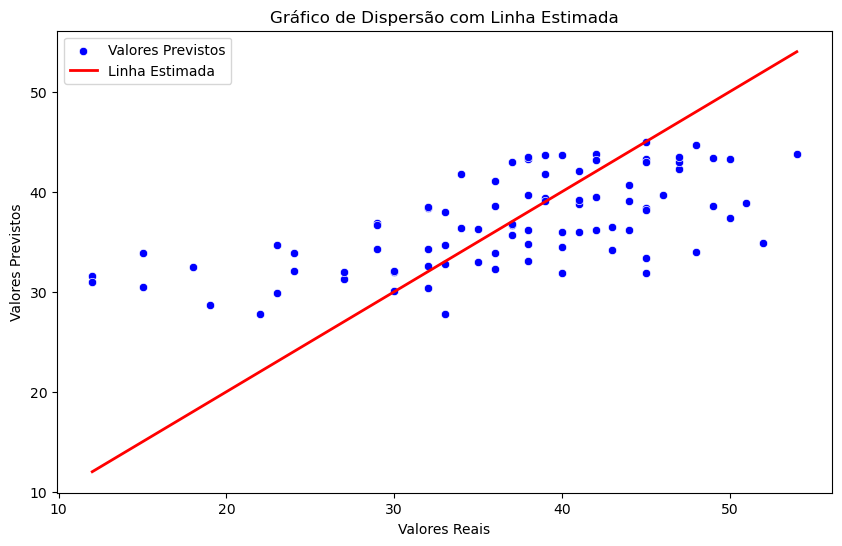

In [598]:
# Seleciona a variável independente (X) e dependente (y)
X = df[['idade', 'gênero', 'status', 'ocupação', 'organização_afiliada', 'qtde_plataformas', 'tempo_medio']]  
y = df['taxa_impacto']  

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Cria o modelo de regressão linear
modelo = LinearRegression()

# Treina o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Faz previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avalia o modelo: erro quadrático médio e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro quadrático médio: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Cria o gráfico com a linha estimada
plt.figure(figsize=(10, 6))

# Gráfico de dispersão dos valores reais e previstos
sns.scatterplot(x=y_test, y=y_pred, label="Valores Previstos", color='blue')

# Adiciona a linha estimada
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Linha Estimada")

# Configurações do gráfico
plt.title("Gráfico de Dispersão com Linha Estimada")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.legend()
plt.show()